In [0]:
!rm -r Batik300/
!rm -r result/

In [2]:
!wget https://github.com/agusekominarno/Batik/raw/master/Dataset/Batik300.zip
!unzip Batik300.zip
!ls Batik300

--2019-04-19 15:06:58--  https://github.com/agusekominarno/Batik/raw/master/Dataset/Batik300.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/agusekominarno/Batik/master/Dataset/Batik300.zip [following]
--2019-04-19 15:06:59--  https://raw.githubusercontent.com/agusekominarno/Batik/master/Dataset/Batik300.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6195654 (5.9M) [application/zip]
Saving to: ‘Batik300.zip.3’

Batik300.zip.3      100%[===================>]   5.91M  --.-KB/s    in 0.1s    

2019-04-19 15:06:59 (59.0 MB/s) - ‘Batik300.zip.3’ saved [6195654/6195654]

Archiv

In [3]:
!ls Batik300/ | wc -l

300


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!cp "/content/drive/My Drive/dataset_batik.zip" dataset_batik.zip
!unzip dataset_batik.zip

Archive:  dataset_batik.zip
replace Testing/Parang/YT084.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Testing/Parang/YT084.jpg  
  inflating: Testing/Parang/Yogya-Parang-Parang-Sogan (6).jpg  
  inflating: Testing/Parang/Yogya-Parang-Parang-Sogan (5).jpg  
  inflating: Testing/Parang/Yogya-Parang-Parang-Sogan (15).jpg  
  inflating: Testing/Parang/Yogya-Parang-Parang-Sogan (12).jpg  
  inflating: Testing/Parang/Yogya-Parang Seling Curiga-Parang-Sogan (2).jpg  
  inflating: Testing/Parang/Yogya-Parang Seling Curiga-Parang-Sogan (1).jpg  
  inflating: Testing/Parang/YK063.jpg  
  inflating: Testing/Parang/YK060.jpg  
  inflating: Testing/Parang/Yogya-Parang-Parang,Ceplok-Sogan.jpg  
  inflating: Testing/Nitik/Yogya-Nitik-Nitik-Sogan (9).jpg  
  inflating: Testing/Nitik/Yogya-Nitik-Nitik-Sogan (3).jpg  
  inflating: Testing/Nitik/Yogya-Nitik-Nitik-Sogan (16).jpg  
  inflating: Testing/Nitik/Yogya-Nitik-Nitik-Sogan (12).jpg  
  inflating: Testing/Nitik/Yogya-Nitik-Nitik-Sogan 

In [6]:
!cp Testing/Ceplok/* "Batik300/"
!cp Testing/Kawung/* "Batik300/"
!cp Testing/Lereng/* "Batik300/"
!cp Testing/"Mix motif"/* "Batik300/"
!cp Testing/Nitik/* "Batik300/"
!cp Testing/Parang/* "Batik300/"

!cp Training/Ceplok/* "Batik300/"
!cp Training/Kawung/* "Batik300/"
!cp Training/Lereng/* "Batik300/"
!cp Training/"Mix motif"/* "Batik300/"
!cp Training/Nitik/* "Batik300/"
!cp Training/Parang/* "Batik300/"

!ls "Batik300/"

 0008-cl.jpg
 0051-cl.jpg
 0051-kp-mdr-jatim-btk-s76-L42a.jpg
 0065-cl.jpg
 0065-kp-pkl-jateng-btk-s76-.jpg
 0068-cl.jpg
 0093-cl.jpg
 0146-cl.jpg
 0150-cl.jpg
 0151-cl.jpg
 0155-cl.jpg
 0158-cl.jpg
 0159-cl.jpg
 0162-cl.jpg
 0163-cl.jpg
 0163-sample-solo-jateng-btk-s76-L410b.jpg
 0166-cl.jpg
 0167-cl.jpg
 0167-sample-solo-jateng-btk-s76-L410b.jpg
 0168-cl.jpg
 0169-cl.jpg
 0170-sample-solo-jateng-btk-s76-L410b.jpg
 0172-cl.jpg
 0173-cl.jpg
 0173-sample-solo-jateng-btk-s76-L410b.jpg
 0175-cl.jpg
 0176-cl.jpg
 0179-cl.jpg
 0180-cl.jpg
 0181-cl.jpg
 0186-cl.jpg
 0193-cl.jpg
 0206-cl.jpg
 0285-cl.jpg
 0318-cl.jpg
 0340-cl.jpg
 0430-cl.jpg
 0450-cl.jpg
 0450-kp-bmas-jateng-btk-b78-L41a.jpg
 0451-cl.jpg
 0488-cl.jpg
 0531-cl.jpg
 06-nitik-randu-seling.jpg
 0863-kp-btg-jateng-btk-b87-L32b.jpg
'10agt 147.jpg'
'10agt 153.jpg'
 10-nitik-motif-batik-kawung.jpg
 1246-cl2.jpg
 1247-cl.jpg
 1253-cl.jpg
 1257-cl.jpg
 1259-cl.jpg
 1300-cl.jpg
 1302-cl.jpg
 1303-cl.jpg
 1408-cl.jpg
 1415-cl.jpg
 1417-

In [7]:
!ls "Batik300/" | wc -l

886


In [0]:
!mkdir result

In [9]:
import sys
import cv2
import os
import time

import matplotlib.pyplot as plt
import numpy as np

from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

class GAN():
    def __init__(self, deep_convolutional):
        self.img_rows = 128
        self.img_cols = 128
        self.channels = 3
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100
        self.deep_convolutional = deep_convolutional

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)


    def build_generator(self):

        model = Sequential()

        if self.deep_convolutional:
          model.add(Dense(128 * 32 * 32, activation="relu", input_dim=self.latent_dim))
          model.add(Reshape((32, 32, 128)))
          model.add(UpSampling2D())
          model.add(Conv2D(128, kernel_size=3, padding="same"))
          model.add(BatchNormalization(momentum=0.8))
          model.add(Activation("relu"))
          model.add(UpSampling2D())
          model.add(Conv2D(64, kernel_size=3, padding="same"))
          model.add(BatchNormalization(momentum=0.8))
          model.add(Activation("relu"))
          model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
          model.add(Activation("tanh"))
        else:
          model.add(Dense(256, input_dim=self.latent_dim))
          model.add(LeakyReLU(alpha=0.2))
          model.add(BatchNormalization(momentum=0.8))
          model.add(Dense(512))
          model.add(LeakyReLU(alpha=0.2))
          model.add(BatchNormalization(momentum=0.8))
          model.add(Dense(1024))
          model.add(LeakyReLU(alpha=0.2))
          model.add(BatchNormalization(momentum=0.8))
          model.add(Dense(np.prod(self.img_shape), activation='tanh'))
          model.add(Reshape(self.img_shape))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        if self.deep_convolutional:
          model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
          model.add(LeakyReLU(alpha=0.2))
          model.add(Dropout(0.25))
          model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
          model.add(ZeroPadding2D(padding=((0,1),(0,1))))
          model.add(BatchNormalization(momentum=0.8))
          model.add(LeakyReLU(alpha=0.2))
          model.add(Dropout(0.25))
          model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
          model.add(BatchNormalization(momentum=0.8))
          model.add(LeakyReLU(alpha=0.2))
          model.add(Dropout(0.25))
          model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
          model.add(BatchNormalization(momentum=0.8))
          model.add(LeakyReLU(alpha=0.2))
          model.add(Dropout(0.25))
          model.add(Flatten())
          model.add(Dense(1, activation='sigmoid'))
        else:
          model.add(Flatten(input_shape=self.img_shape))
          model.add(Dense(512))
          model.add(LeakyReLU(alpha=0.2))
          model.add(Dense(256))
          model.add(LeakyReLU(alpha=0.2))
          model.add(Dense(1, activation='sigmoid'))
          
        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def get_batik_dataset(self):
        DATASET_FOLDER = "Batik300"
        SHAPE = (128, 128,)

        dataset = []

        file_names = os.listdir(DATASET_FOLDER)
        for file_name in file_names:
            image = cv2.imread(DATASET_FOLDER + "/" + file_name)
            try:
              image = cv2.resize(image, SHAPE)
              dataset.append(image)
            except:
              print(file_name)  

        return np.array(dataset)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        X_train = self.get_batik_dataset()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        # X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,:])
                axs[i,j].axis('off')
                cnt += 1
        if self.deep_convolutional:
          fig.savefig("result/deep_convolutional_%d.png" % epoch)
        else:
          fig.savefig("result/%d.png" % epoch)
        plt.close()

Using TensorFlow backend.


In [10]:
start = time.time()
gan = GAN(deep_convolutional=False)
gan.train(epochs=4500, batch_size=32, sample_interval=200)
end = time.time()
print("Elapsed time: %d second" % (end - start))

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               25166336  
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 25,297,921
Trainable params: 25,297,921
Non-trainable pa

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.579716, acc.: 48.44%] [G loss: 0.597683]
1 [D loss: 0.834871, acc.: 65.62%] [G loss: 0.564147]
2 [D loss: 0.773718, acc.: 60.94%] [G loss: 0.503259]
3 [D loss: 0.733891, acc.: 62.50%] [G loss: 0.555350]
4 [D loss: 1.145190, acc.: 65.62%] [G loss: 1.048263]
5 [D loss: 1.045406, acc.: 65.62%] [G loss: 1.527912]
6 [D loss: 0.955281, acc.: 76.56%] [G loss: 1.948802]
7 [D loss: 0.811563, acc.: 70.31%] [G loss: 2.062577]
8 [D loss: 0.906119, acc.: 76.56%] [G loss: 2.372092]
9 [D loss: 0.501315, acc.: 79.69%] [G loss: 2.309810]
10 [D loss: 0.502734, acc.: 76.56%] [G loss: 2.626398]
11 [D loss: 0.351256, acc.: 82.81%] [G loss: 3.037346]
12 [D loss: 0.364377, acc.: 84.38%] [G loss: 2.833280]
13 [D loss: 0.617274, acc.: 76.56%] [G loss: 2.579576]
14 [D loss: 0.738750, acc.: 70.31%] [G loss: 2.939738]
15 [D loss: 0.300690, acc.: 87.50%] [G loss: 3.120324]
16 [D loss: 0.308036, acc.: 87.50%] [G loss: 4.050548]
17 [D loss: 0.345839, acc.: 85.94%] [G loss: 3.751588]
18 [D loss: 0.181788

In [11]:
start = time.time()
gan = GAN(deep_convolutional=True)
gan.train(epochs=4500, batch_size=32, sample_interval=200)
end = time.time()
print("Elapsed time: %d second" % (end - start))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 33, 33, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 33, 33, 64)        256       
___________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 2.756769, acc.: 21.88%] [G loss: 0.177567]
1 [D loss: 1.192797, acc.: 48.44%] [G loss: 1.844220]
2 [D loss: 1.777129, acc.: 26.56%] [G loss: 2.080606]
3 [D loss: 2.278649, acc.: 9.38%] [G loss: 0.842896]
4 [D loss: 1.827509, acc.: 10.94%] [G loss: 1.160739]
5 [D loss: 2.235595, acc.: 3.12%] [G loss: 0.963856]
6 [D loss: 2.417048, acc.: 6.25%] [G loss: 1.085798]
7 [D loss: 1.894464, acc.: 12.50%] [G loss: 1.092394]
8 [D loss: 2.329394, acc.: 4.69%] [G loss: 0.573318]
9 [D loss: 2.097108, acc.: 6.25%] [G loss: 0.386092]
10 [D loss: 1.908166, acc.: 6.25%] [G loss: 0.468108]
11 [D loss: 2.247462, acc.: 7.81%] [G loss: 0.391832]
12 [D loss: 2.586774, acc.: 1.56%] [G loss: 0.723103]
13 [D loss: 2.283435, acc.: 4.69%] [G loss: 0.741773]
14 [D loss: 2.926659, acc.: 0.00%] [G loss: 0.812824]
15 [D loss: 2.963787, acc.: 0.00%] [G loss: 0.988161]
16 [D loss: 3.164207, acc.: 1.56%] [G loss: 1.262732]
17 [D loss: 2.440438, acc.: 3.12%] [G loss: 1.160130]
18 [D loss: 2.279389, acc.: 4.69%

In [12]:
!ls result

0.png	  3800.png		       deep_convolutional_2400.png
1000.png  4000.png		       deep_convolutional_2600.png
1200.png  400.png		       deep_convolutional_2800.png
1400.png  4200.png		       deep_convolutional_3000.png
1600.png  4400.png		       deep_convolutional_3200.png
1800.png  600.png		       deep_convolutional_3400.png
2000.png  800.png		       deep_convolutional_3600.png
200.png   deep_convolutional_0.png     deep_convolutional_3800.png
2200.png  deep_convolutional_1000.png  deep_convolutional_4000.png
2400.png  deep_convolutional_1200.png  deep_convolutional_400.png
2600.png  deep_convolutional_1400.png  deep_convolutional_4200.png
2800.png  deep_convolutional_1600.png  deep_convolutional_4400.png
3000.png  deep_convolutional_1800.png  deep_convolutional_600.png
3200.png  deep_convolutional_2000.png  deep_convolutional_800.png
3400.png  deep_convolutional_200.png
3600.png  deep_convolutional_2200.png


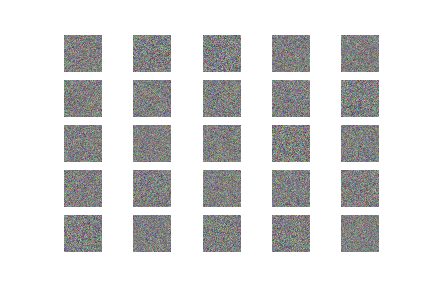

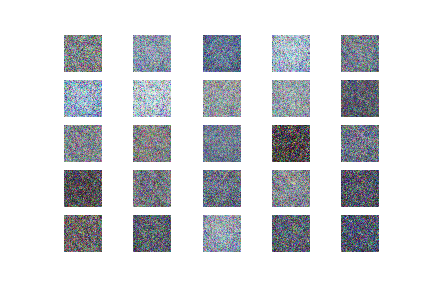

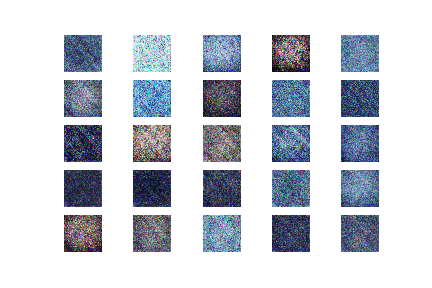

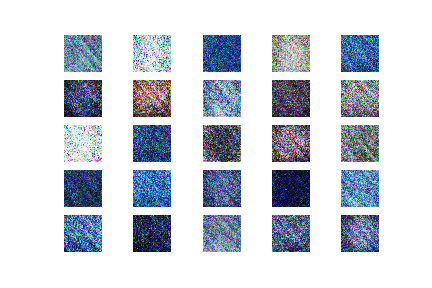

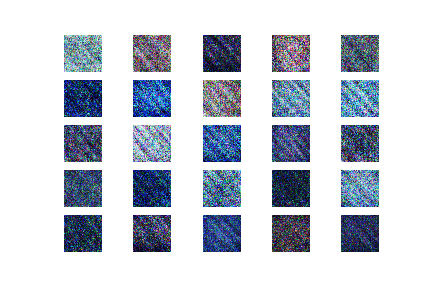

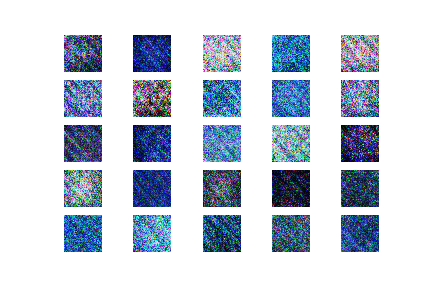

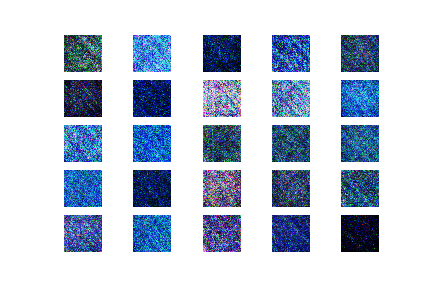

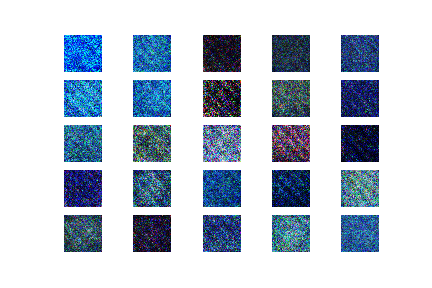

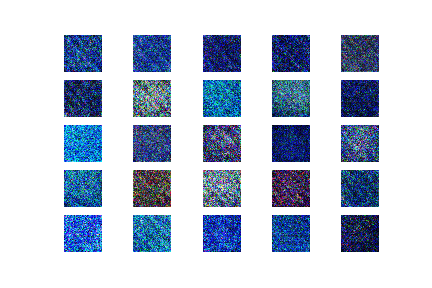

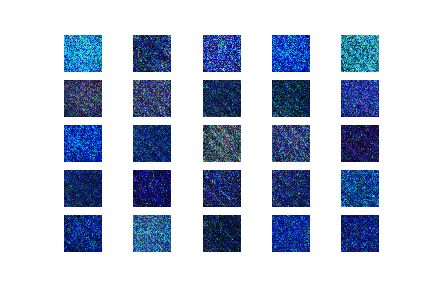

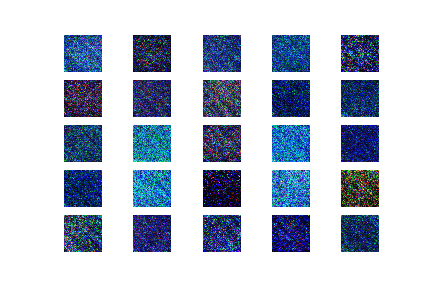

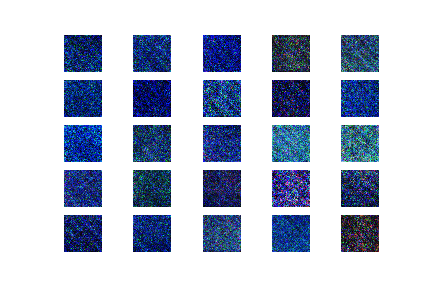

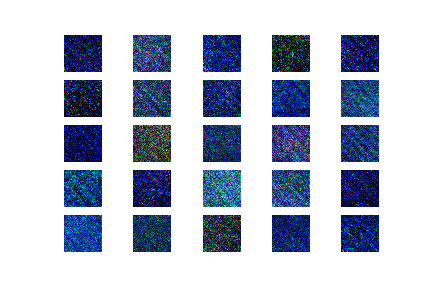

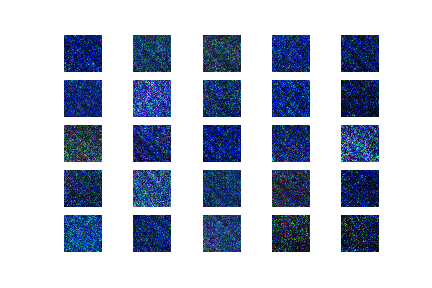

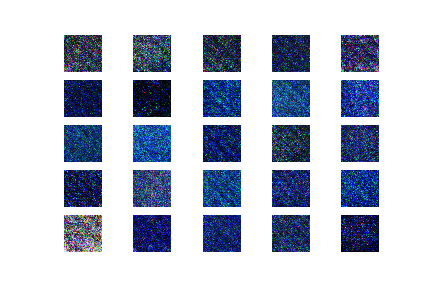

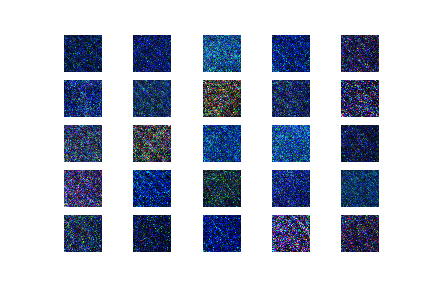

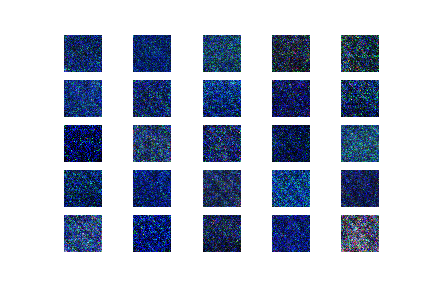

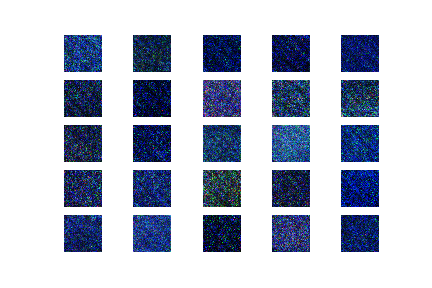

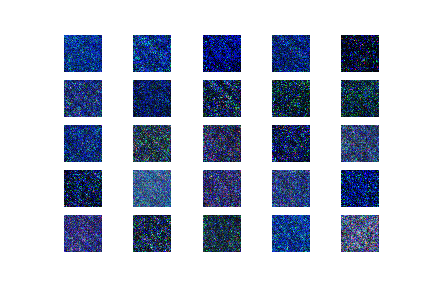

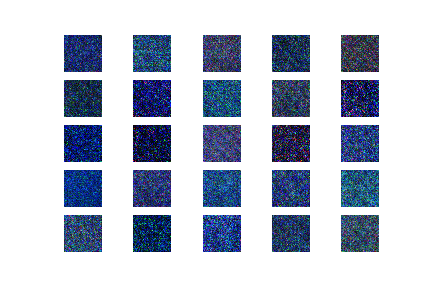

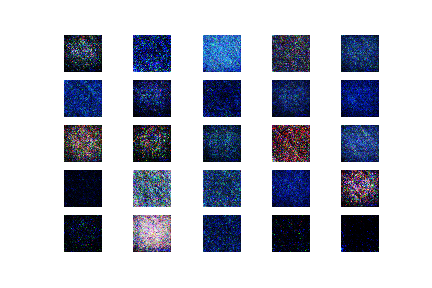

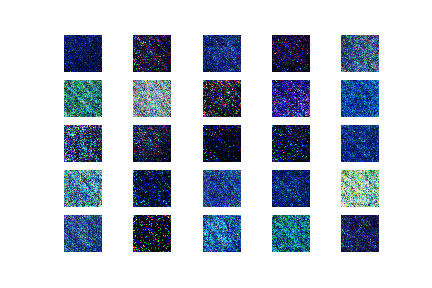

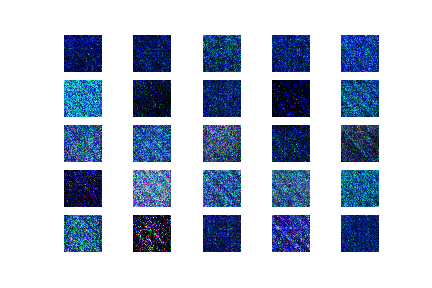

In [13]:
from IPython.display import Image, display
for i in range(0, 4500, 200):
  display(Image('result/%d.png' % i))

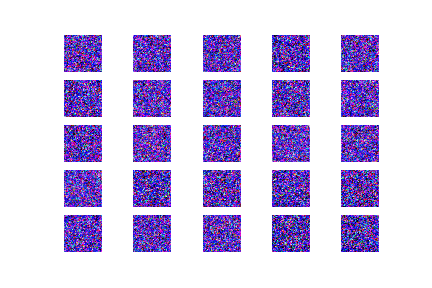

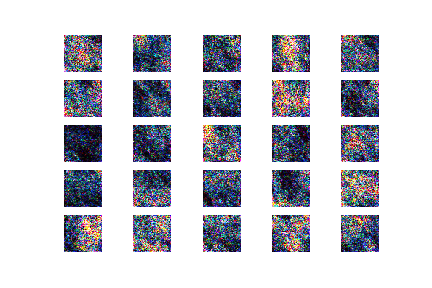

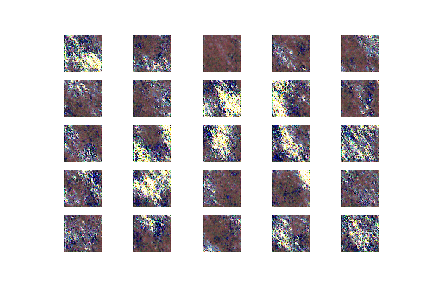

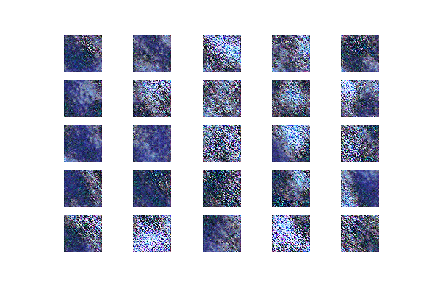

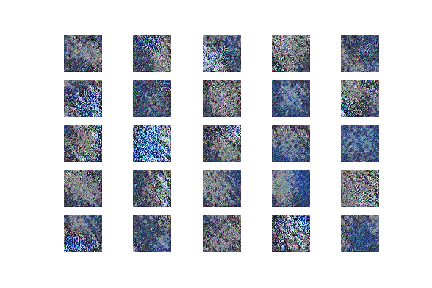

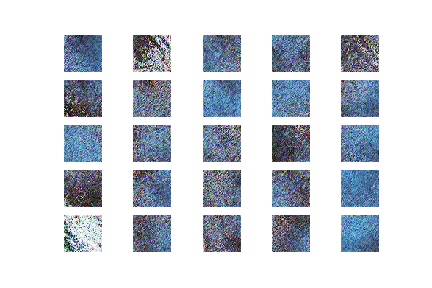

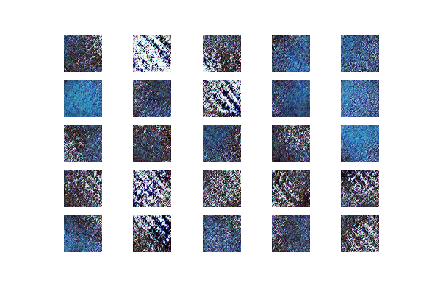

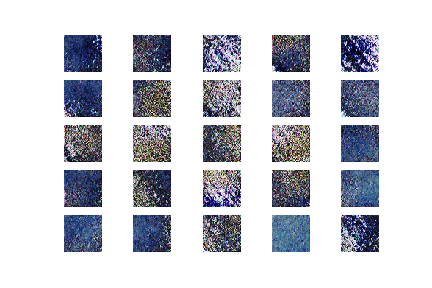

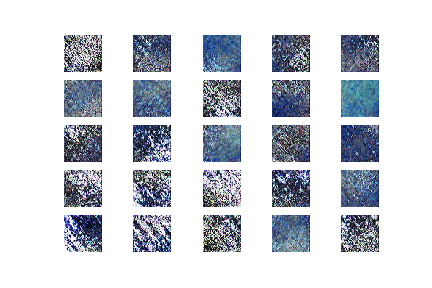

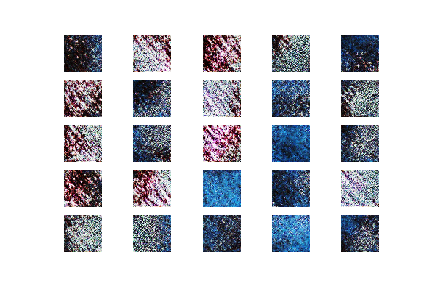

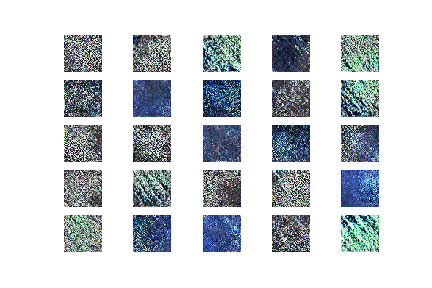

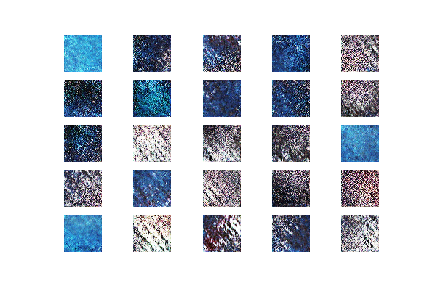

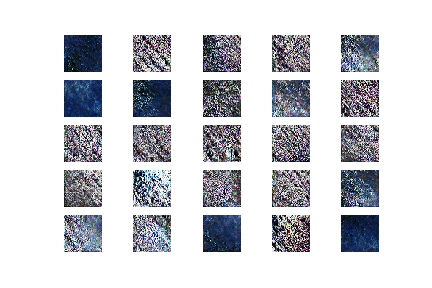

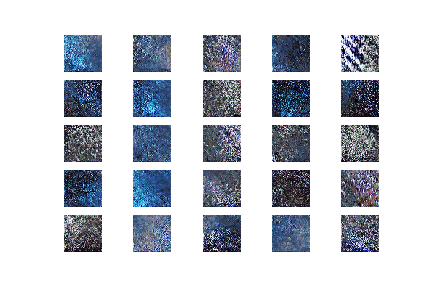

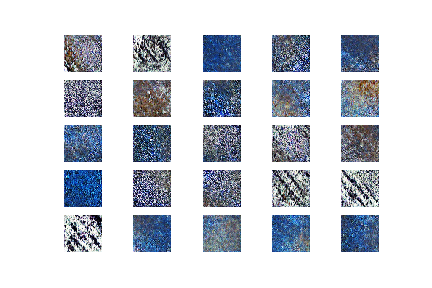

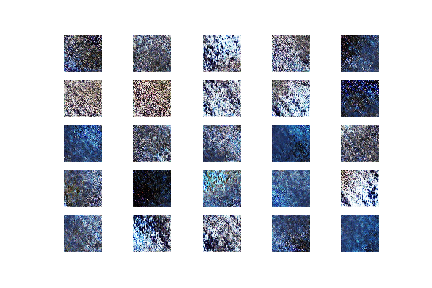

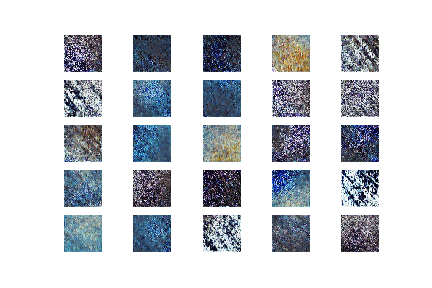

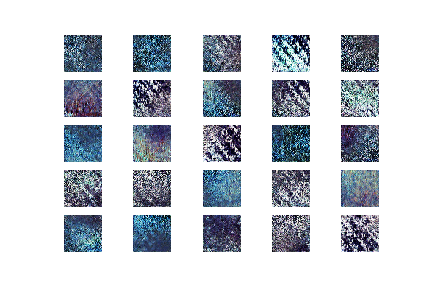

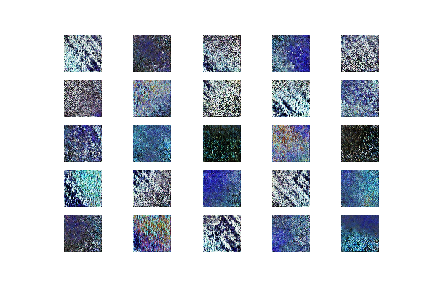

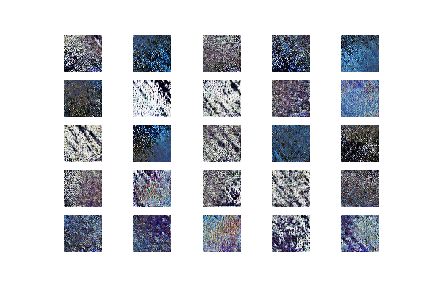

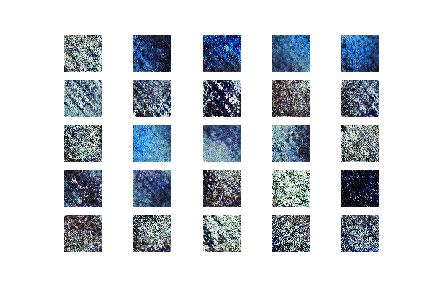

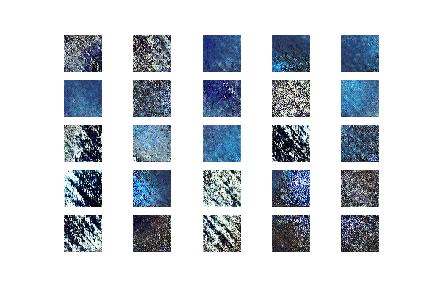

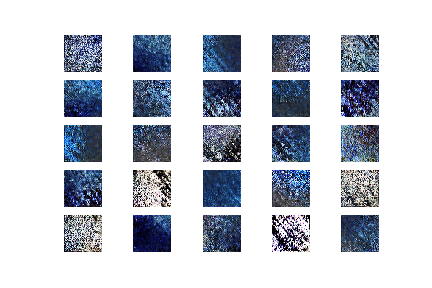

In [14]:
for i in range(0, 4500, 200):
  display(Image('result/deep_convolutional_%d.png' % i))